# Basics of Probabilistic Programming using PyMC

### yes, we will be talking about Frequentist vs Bayesian

# Introduction to Descriptive Statistics and Probability

Descriptive statistics and probability provide essential insights into datasets by summarizing and organizing data points. They help us understand the characteristics, trends, and patterns present in the data. Descriptive statistics are categorized into univariate, bivariate, and multivariate statistics, while probability involves assessing the likelihood of events. Additionally, regression estimates help model relationships between variables.

## Univariate Statistics

| Statistics           | Population Representation | Sample Representation |
|----------------------|--------------------------|-----------------------|
| Mean (μ)             | μ = Σx / N               | x̄ = Σx / n           |
| Variance (σ²)        | σ² = Σ(x - μ)² / N       | s² = Σ(x - x̄)² / (n-1)|
| Standard Deviation (σ)| σ = √σ²                 | s = √s²               |
| Median               | --                       | --                    |
| Quartiles            | --                       | --                    |
| Skewness             | --                       | --                    |
| Kurtosis             | --                       | --                    |
| Probability (P)             | --                       | --                    |

## Bivariate Statistics

| Statistics           | Population Representation | Sample Representation |
|----------------------|--------------------------|-----------------------|
| Covariance (σ_xy)    | σ_xy = Σ[(x - μ_x)(y - μ_y)] / N | s_xy = Σ[(x - x̄)(y - ȳ)] / (n-1) |
| Correlation (ρ)      | ρ = σ_xy/ (σ_x * σ_y)                     |  r / (s_x * s_y)                    |

## Regression Estimates

| Regression Estimates | Population Representation | Sample Representation |
|----------------------|--------------------------|-----------------------|
| Constant (Intercept) | β₀                       | b₀                    |
| Slope (Coefficient)  | β₁                       | b₁                    |

## Multivariate Statistics

| Statistics           | Population Representation | Sample Representation |
|----------------------|--------------------------|-----------------------|
| Covariance Matrix (Σ)| --                       | --                    |
| Correlation Matrix (R)| --                       | --                    |


Descriptive statistics, probability, and regression estimates offer a powerful toolset for summarizing, analyzing, and interpreting data, assessing likelihood, and modeling relationships between variables. They provide a foundation for making informed decisions and drawing insights from datasets.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pymc3 as pm
from IPython.display import display, clear_output
from IPython.display import Math
import time

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def sample_data(sample_size):
    sample = np.random.choice(combined_data, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    return sample, sample_mean, sample_std

def sample_with_outlier(sample_size):
    s1=int(sample_size*np.random.choice([0.2,0.8]))
    cutoff=int(len(combined_data)/5)
    sample = np.append(np.random.choice(sorted(combined_data)[:cutoff], size=s1, replace=False),
    np.random.choice(sorted(combined_data)[sample_size-cutoff:], size=sample_size-s1, replace=False))
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    return sample, sample_mean, sample_std

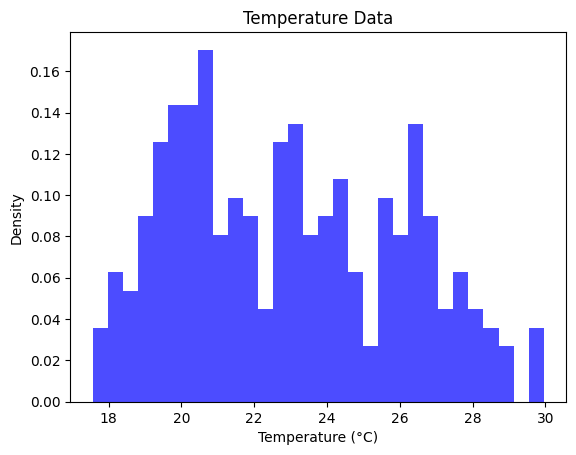

In [3]:
peak1_data = np.random.normal(15, 2, 100)
peak2_data = np.random.normal(25, 2, 150)
peak3_data = np.random.normal(20, 1.5, 120)
combined_data = np.concatenate((peak1_data, peak2_data, peak3_data))
combined_data = np.concatenate((peak2_data, peak3_data))

plt.hist(combined_data, bins=30, density=True, alpha=0.7, color='blue')
plt.xlabel('Temperature (°C)')
plt.title('Temperature Data')
plt.ylabel('Density')
plt.show()


In [12]:
sample=sample_data(sample_size=5)
print(sample[0])
print()
print(sample[1])
print()
print(sample[2])

[29.69103638 23.05222111 19.71663539 26.66545    24.90661318]

24.806391209895246

3.355849504852808


![Central Limit Theorem](https://www.coursehero.com/qa/attachment/12045207/)

In [19]:
np.random.seed(42)
num_samples=1000

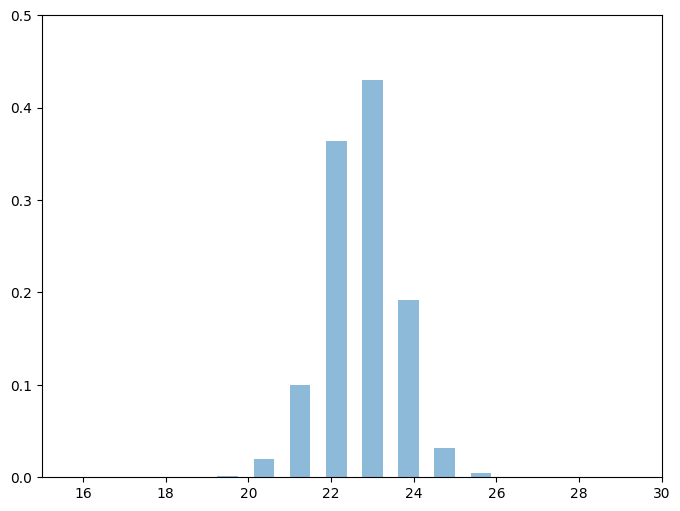

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0,35)
ax.set_ylim(0, 0.6)
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Histogram of Sample Drawn One at a Time')
cumulative_hist = np.zeros(40)
for _ in range(num_samples):
    sample = sample_data(round(random.uniform(1, 5) * 5))
    hist, bins = np.histogram(sample[1], bins=40, range=(0,35))
    cumulative_hist += hist
    ax.clear()
    ax.bar(bins[:-1], cumulative_hist / (sum(cumulative_hist) * (bins[1] - bins[0])), width=0.5, align='edge', alpha=0.5)
    if _ < 10:
        ax.set_xlim(15,30)
        ax.set_ylim(0, 0.8)
        display(fig)
        clear_output(wait=True)
        time.sleep(1)
    elif _ % int(num_samples ** 0.25) == 0:
        ax.set_xlim(15,30)
        ax.set_ylim(0, 0.5)
        display(fig)
        clear_output(wait=True)
plt.close(fig)

# Law of Large Numbers (LLN)

![Law of Large Numbers](https://www.probabilisticworld.com/wp-content/uploads/2018/11/law-large-numbers.png)

![Convergence to Mean](https://blog.mathandpencil.com/images/posts/clt.png)

# Shortcomings of Sampling from a Large and Diverse Population

- **Resource Intensive:** Requires more time, budget, and larger sample sizes to effectively capture diversity.

- **Time consuming:** Risk of shift in pattern over a period of collection

- **Sampling Bias:** Risk of bias due to overrepresentation or underrepresentation of certain groups, leading to skewed results.



In [27]:
sample=sample_with_outlier(sample_size=10)
print(sample[0])
print()
print(sample[1])
print()
print(sample[2])

[18.00319673 19.90314706 19.95039233 19.46116324 18.75364422 18.27713232
 18.34965017 19.52717958 26.5123854  27.74658389]

20.64844749491948

3.316235564454904


# Bayesian Approach

![Bayes](https://miro.medium.com/v2/resize:fit:792/format:webp/1*VwvtCnwVnX71iMgHTrBRJQ.png)

{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}
{'prior': 0.1, 'likelihood': 1, 'prior*likelihood': 0.1}


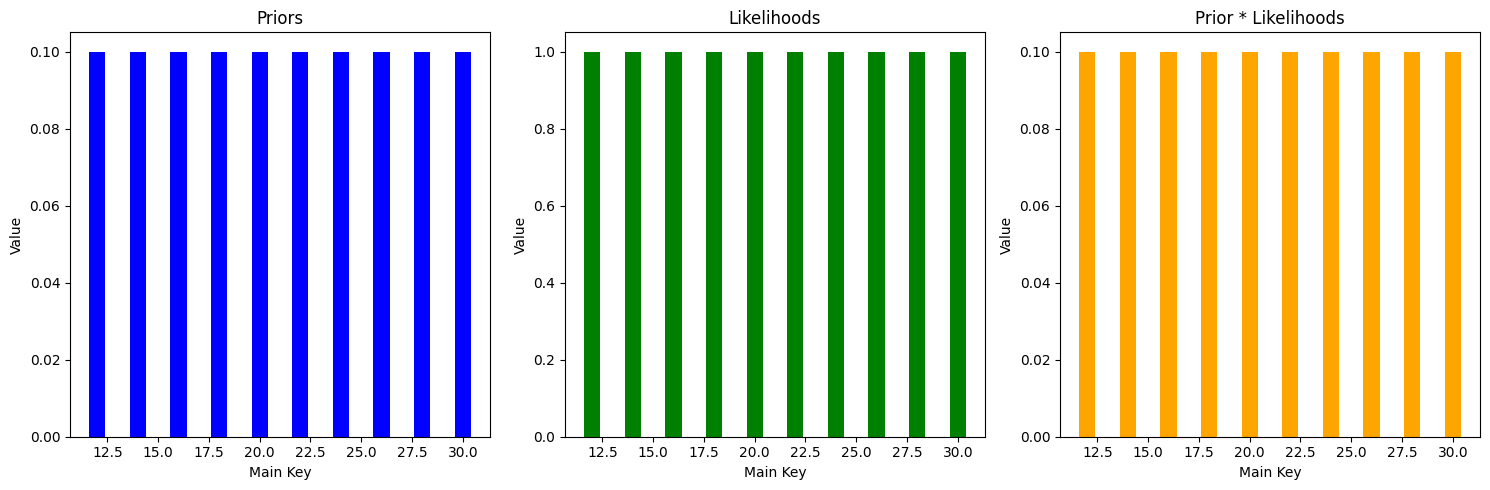

In [36]:
data={
    12:{'prior':0.1,'likelihood':1},
    14:{'prior':0.1,'likelihood':1},
    16:{'prior':0.1,'likelihood':1},
    18:{'prior':0.1,'likelihood':1},
    20:{'prior':0.1,'likelihood':1},
    22:{'prior':0.1,'likelihood':1},
    24:{'prior':0.1,'likelihood':1},
    26:{'prior':0.1,'likelihood':1},
    28:{'prior':0.1,'likelihood':1},
    30:{'prior':0.1,'likelihood':1}
}
for k in data:
    data[k]['prior*likelihood']=data[k]['prior']*data[k]['likelihood']
    print(data[k])
    
x_values = list(data.keys())
prior_values = [item['prior'] for item in data.values()]
likelihood_values = [item['likelihood'] for item in data.values()]
prior_likelihood_values = [item['prior*likelihood'] for item in data.values()]

# Create bar charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bar chart for priors
axes[0].bar(x_values, prior_values, color='blue')
axes[0].set_title('Priors')
axes[0].set_xlabel('Main Key')
axes[0].set_ylabel('Value')

# Bar chart for likelihoods
axes[1].bar(x_values, likelihood_values, color='green')
axes[1].set_title('Likelihoods')
axes[1].set_xlabel('Main Key')
axes[1].set_ylabel('Value')

# Bar chart for prior*likelihoods
axes[2].bar(x_values, prior_likelihood_values, color='orange')
axes[2].set_title('Prior * Likelihoods')
axes[2].set_xlabel('Main Key')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()


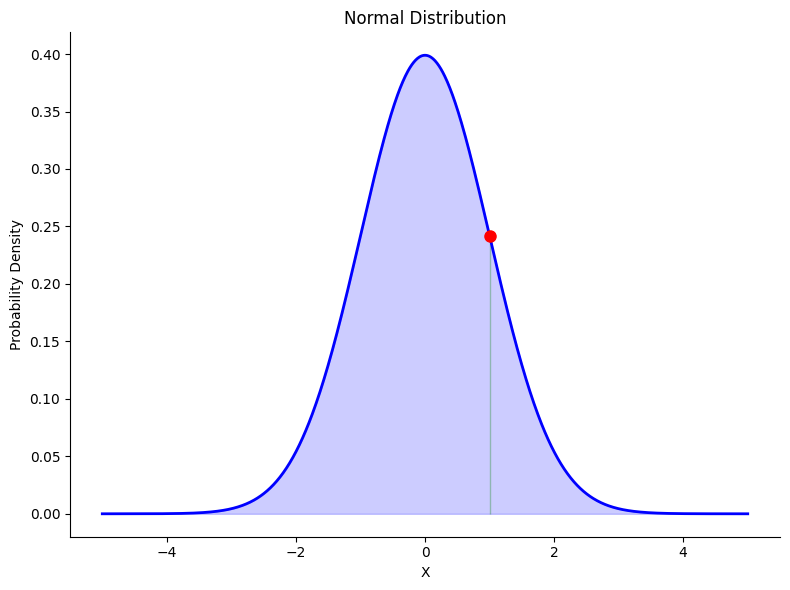

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Generate data for a normal distribution
mu = 0   # Mean
sigma = 1   # Standard deviation
x = np.linspace(-5, 5, 1000)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color='blue', linewidth=2)
ax.fill_between(x, y, color='blue', alpha=0.2)
ax.set_title('Normal Distribution')


# Highlight a point to explain likelihood
likelihood_x = 1
likelihood_y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((likelihood_x - mu) / sigma)**2)
ax.plot([likelihood_x], [likelihood_y], marker='o', markersize=8, color='red')

x_fill = np.linspace(1, 1, 100)
# x_fill = np.linspace(0.9, 1.1, 100)
y_fill = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_fill - mu) / sigma)**2)
ax.fill_between(x_fill, y_fill, color='green', alpha=0.3)

# ax.annotate('Likelihood', xy=(likelihood_x, likelihood_y), xytext=(likelihood_x+0.01, likelihood_y+0.01), arrowprops=dict(arrowstyle='->'),fontsize=12, color='red')
# ax.text(-0.2, 0.1, 'Probability', fontsize=12, color='white')


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x and y axis labels
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


## PyMC

In [ ]:
### MC - Monte Carlo Samplilng

In [53]:
# Generate example data
np.random.seed(42)
data = sample_data(sample_size=100)[0]

In [ ]:
data

/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean_posterior]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warni

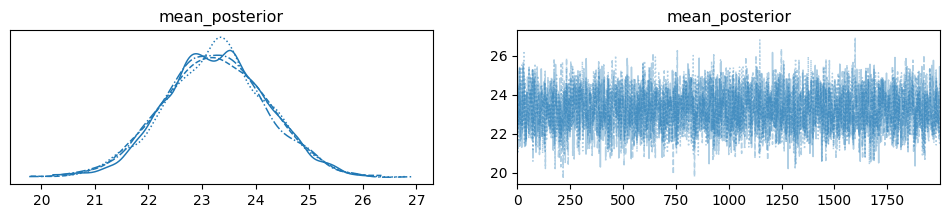

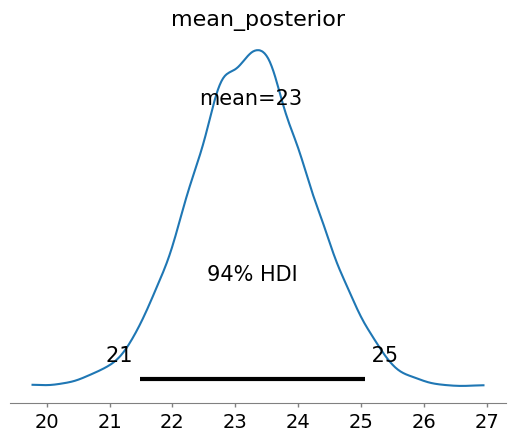

In [75]:
# Model definition
with pm.Model() as model:
    # mean_prior = pm.Uniform('mean_posterior', lower=0, upper=100)
    mean_prior = pm.Normal('mean_posterior', mu=25, sd=3)
    likelihood = pm.Normal('obs', mu=mean_prior, sd=10, observed=data)

    # trace = pm.sample(2000,  step=pm.Metropolis()) 
    trace = pm.sample(2000, tune=1000, cores=4,  step=pm.NUTS()) 
    # NUTS (No-U-Turn Sampler), HMC (Hamiltonian Monte Carlo), Slice Sampler, CategoricalGibbsMetropolis

pm.plot_trace(trace, var_names=['mean_posterior'])
pm.plot_posterior(trace, var_names=['mean_posterior'])

plt.show()


/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [stdev_posterior]
>Slice: [mean_posterior]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warni

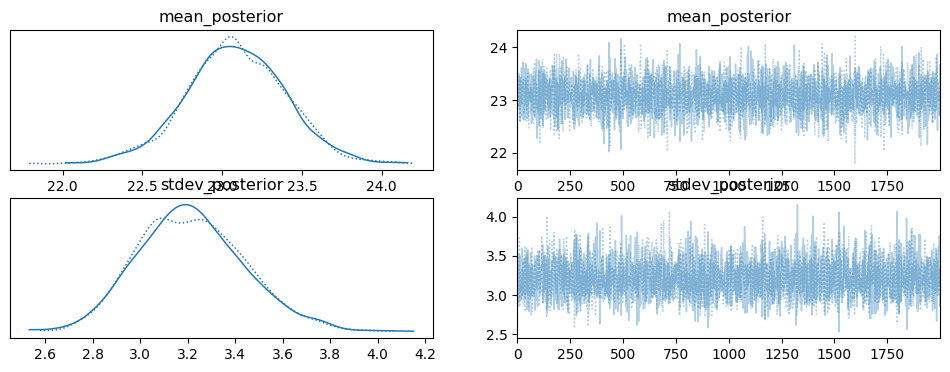

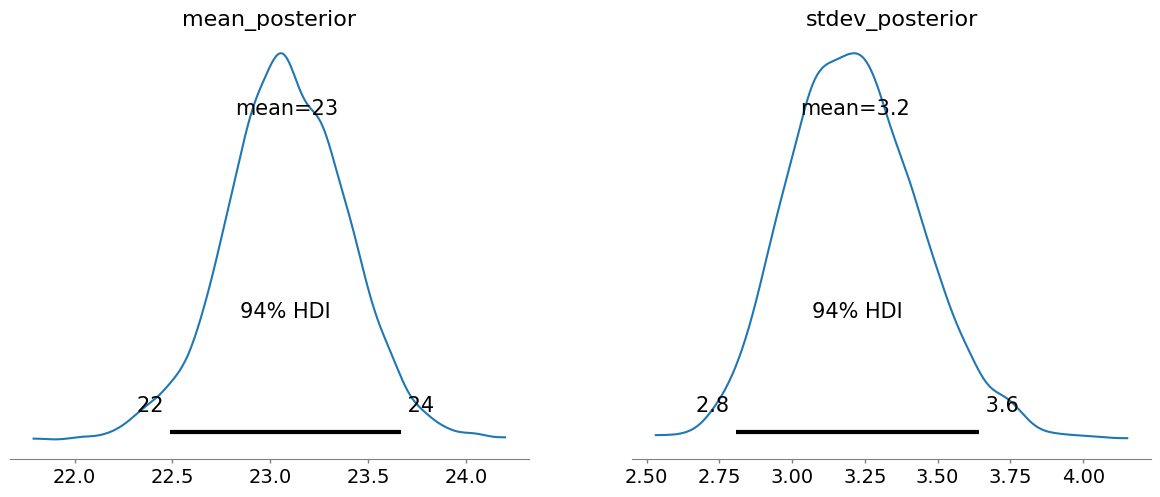

In [66]:
# Model definition
with pm.Model() as model:
    mean_prior = pm.Normal('mean_posterior', mu=25, sd=3)
    stdev_prior = pm.HalfNormal('stdev_posterior', sd=2)
    
    likelihood = pm.Normal('obs', mu=mean_prior, sd=stdev_prior, observed=data)
    
    trace = pm.sample(2000, tune=1000, cores=4,  step=pm.Slice()) 
    # NUTS (No-U-Turn Sampler), HMC (Hamiltonian Monte Carlo), Slice Sampler, CategoricalGibbsMetropolis

pm.plot_trace(trace, var_names=['mean_posterior','stdev_posterior'])
pm.plot_posterior(trace, var_names=['mean_posterior','stdev_posterior'])

plt.show()


/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [std_dev, mean]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 2 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  war

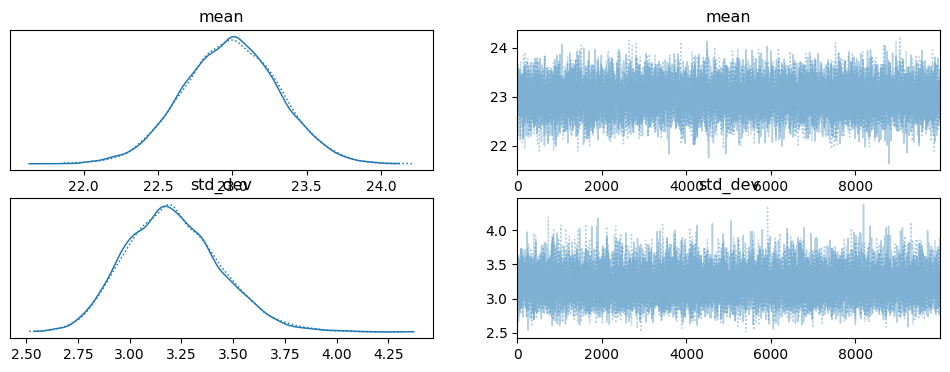

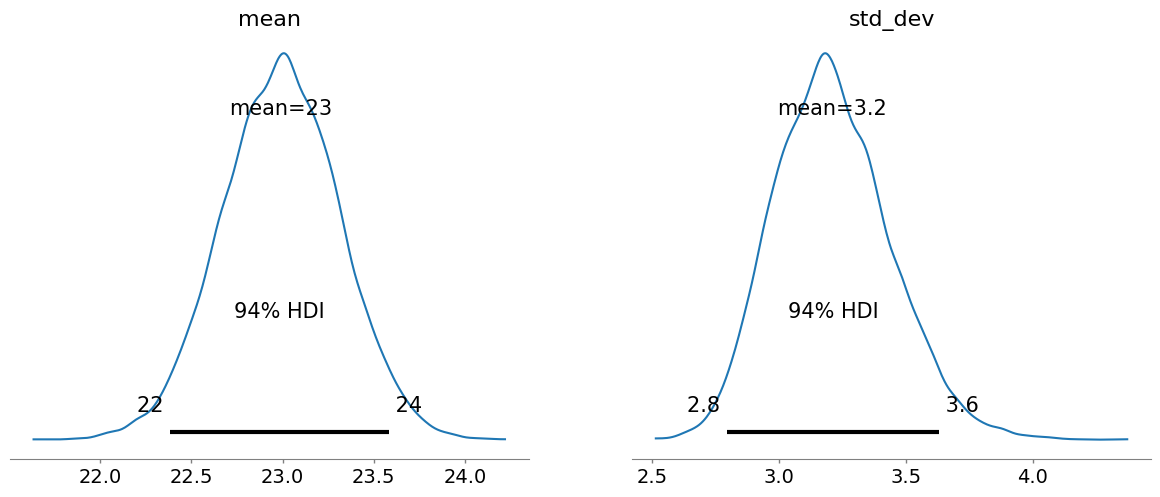

In [67]:
# Model definition
with pm.Model() as model:
    mean = pm.Normal('mean', mu=20, sd=2)
    std_dev = pm.HalfNormal('std_dev', sd=2)
    obs = pm.Normal('obs', mu=mean, sd=std_dev, observed=data)
    trace = pm.sample(2000, tune=1000, cores=4)  # Adjust these parameters as needed
# Plot the distribution of mean and standard deviation
pm.plot_trace(trace, var_names=['mean','std_dev'])
pm.plot_posterior(trace, var_names=['mean','std_dev'])
plt.show()


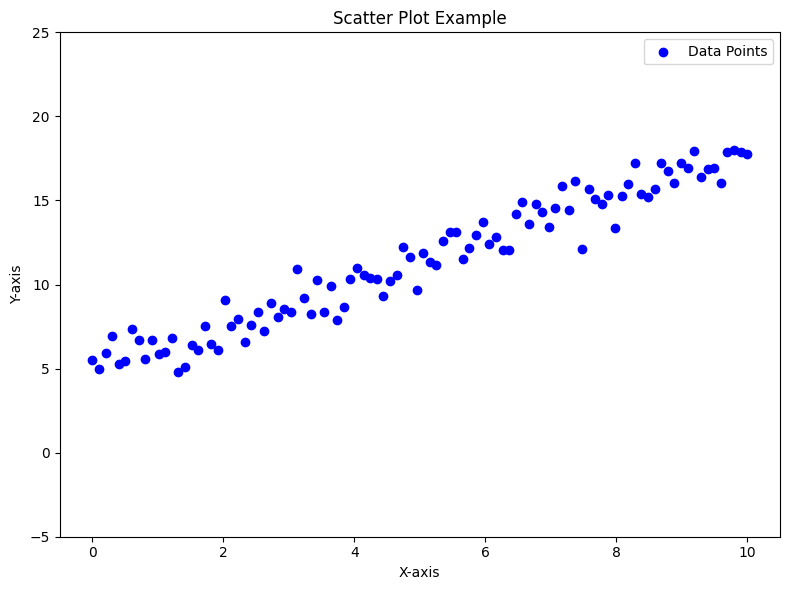

In [73]:
# Sample data for linear regression
np.random.seed(42)
x = np.linspace(0, 10, 100)
true_intercept = 5
true_slope = 1.3
y = true_intercept + true_slope * x + np.random.normal(0, 1, 100)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', marker='o', label='Data Points')

plt.ylim(-5, 25)
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Example')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [slope, intercept]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
The acceptance probability does not match the target. It is 0.8936956175080867, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


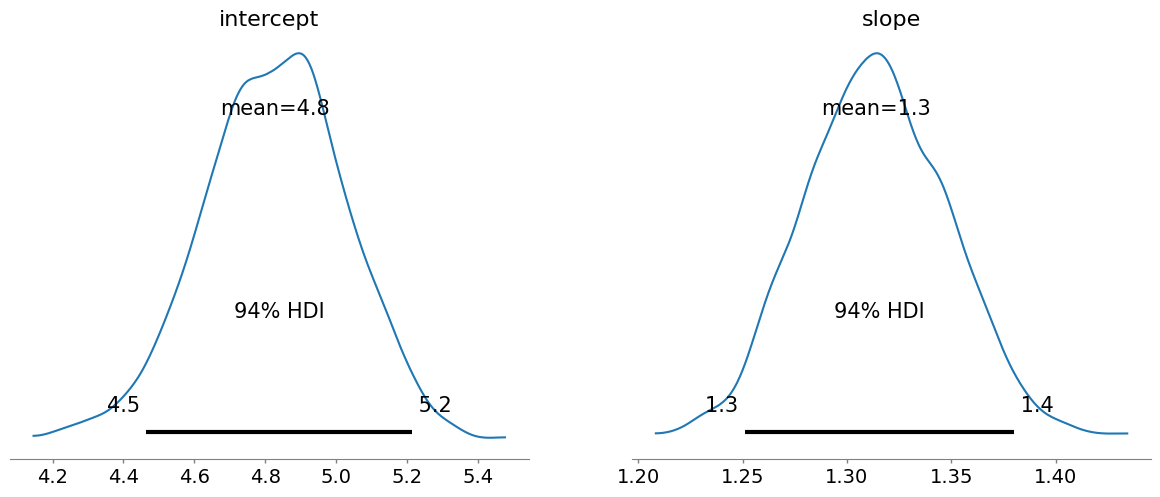

In [74]:

# Define a PyMC3 model for linear regression
with pm.Model() as model:
    # Priors for intercept and slope
    b1_prior = pm.Normal('b1_posterior', mu=0, sd=10)
    b2_prior = pm.Normal('b2_posterior', mu=0, sd=10)
    
    # Expected value of the linear regression
    expected_value = b1_prior + b2_prior * x
    
    # Likelihood
    likelihood = pm.Normal('likelihood', mu=expected_value, sd=1, observed=y)
    
    # Sample using NUTS
    trace = pm.sample(2000, tune=1000, cores=4)

# Plot the posterior distributions
pm.plot_posterior(trace, var_names=['b1_posterior', 'b2_posterior'])
plt.show()
